In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fly_plot_lib.plot as fpl
import matplotlib

In [18]:
import figurefirst as fifi
import flystat

In [3]:
# order = SG_tip_para, SG_f_perp, SG_f_para, SG_binding, SG_b_para, SG_b_perp 

In [4]:
position = ['f', 'f', 'f', 'binding', 'b', 'b']
orientation = ['para', 'perp', 'para', 'para', 'para', 'perp']

In [5]:
singles_percent = [85.5, 94.3, 89.3, 85.5, 89.4, 84.5]
singles_number  = [5,    4,    3,    4,    3,    4]

In [6]:
pairs_percent = np.array([[85.5, 93.7, 86.2, 94.6, 92, 97.5],
                          [np.nan, 94.3, 79.5, 85.7, 93.7, 84.8],
                          [np.nan, np.nan, 89.3, 92.2, 94.9, 91.2],
                          [np.nan, np.nan, np.nan, 85.5, 90.1, 89.8],
                          [np.nan, np.nan, np.nan, np.nan, 89.4, 94.9],
                          [np.nan, np.nan, np.nan, np.nan, np.nan, 84.5]])

pairs_number = np.array([[5, 8, 40, 25, 7, 5],
                         [np.nan, 4, 5, 32, 7, 27],
                         [np.nan, np.nan, 3, 79, 8, 8],
                         [np.nan, np.nan, np.nan, 4, 11, 19],
                         [np.nan, np.nan, np.nan, np.nan, 3, 5],
                         [np.nan, np.nan, np.nan, np.nan, np.nan, 4]])

In [7]:
# make symmetric

pairs_percent = np.nanmean([pairs_percent, pairs_percent.T], axis=0)
pairs_number = np.nanmean([pairs_number, pairs_number.T], axis=0)

# Raw

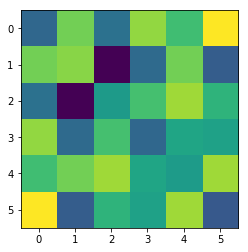

In [8]:
plt.imshow(pairs_percent, origin='upper')

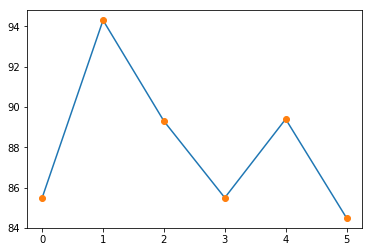

In [9]:
plt.plot(singles_percent)
plt.plot(singles_percent, 'o')

In [10]:
colornorm = matplotlib.colors.Normalize(vmin=80, vmax=100, clip=False )
cmap = matplotlib.cm.get_cmap('viridis')

# Figurefirst

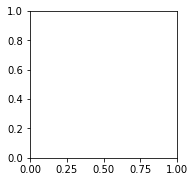

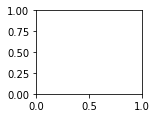

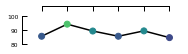

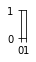

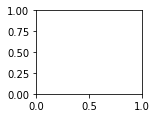

In [11]:
layout = fifi.svg_to_axes.FigureLayout('ski_summary.svg', 
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

ax = layout.axes[('singles', 'singles')]
ax.plot(singles_percent, color='black')
ax.scatter([0,1,2,3,4,5], singles_percent, c=colornorm(singles_percent), vmin=0, vmax=1, 
           cmap='viridis', zorder=10)

ax.set_ylim(80, 100)

fifi.mpl_functions.adjust_spines(ax, ['left', 'top'], yticks=[80, 90, 100], xticks=[0,1,2,3,4,5])
ax.set_xticklabels([])
fifi.mpl_functions.set_fontsize(ax, 6)
layout.append_figure_to_layer(layout.figures['singles'], 'singles', cleartarget=True)
layout.write_svg('ski_summary.svg')

In [12]:
def colorbar(ax=None, colormap='jet', orientation='vertical', ticks=[0,1]):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    xlim = ticks
    ylim = ticks
    
    # horizontal
    if orientation == 'horizontal':
        grad = np.linspace(ticks[0], ticks[1], 500, endpoint=True)
        im = np.vstack((grad,grad))
    
    # vertical
    if orientation == 'vertical':
        grad = np.linspace(ticks[0], ticks[1], 500, endpoint=True)
        im = np.vstack((grad,grad)).T
    
    # make image
    cmap = plt.get_cmap(colormap)
    ax.imshow(  im, 
                cmap=cmap,
                extent=(xlim[0], xlim[-1], ylim[0], ylim[-1]), 
                origin='lower', 
                interpolation='bicubic')
    
    ax.set_aspect('auto')
    ax.set_xlim(xlim[0], xlim[-1])
    ax.set_ylim(ylim[0], ylim[-1])
    

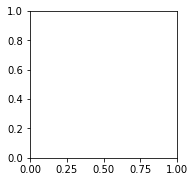

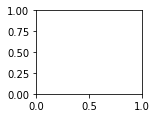

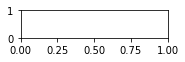

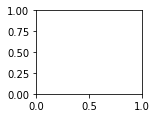

In [13]:
layout = fifi.svg_to_axes.FigureLayout('ski_summary.svg', 
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

ax = layout.axes[('colorbar', 'colorbar')]
colorbar(ax, colormap='viridis')

fifi.mpl_functions.adjust_spines(ax, [])
layout.append_figure_to_layer(layout.figures['colorbar'], 'colorbar', cleartarget=True)
layout.write_svg('ski_summary.svg')

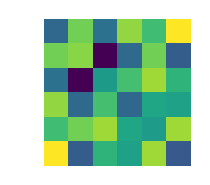

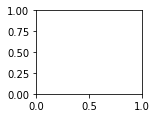

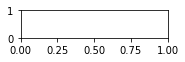

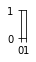

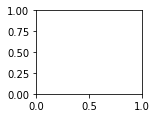

In [14]:
layout = fifi.svg_to_axes.FigureLayout('ski_summary.svg', 
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

ax = layout.axes[('pairs', 'pairs')]
ax.imshow(pairs_percent, origin='upper')

fifi.mpl_functions.adjust_spines(ax, [])
fifi.mpl_functions.set_fontsize(ax, 6)
layout.append_figure_to_layer(layout.figures['pairs'], 'pairs', cleartarget=True)
layout.write_svg('ski_summary.svg')

In [15]:
single_combos = []
single_markers = []
for i, pi in enumerate(position):
    for j, pj in enumerate(position):
        if j==i:
            single_combos.append([i,j])
            if orientation[i] == orientation[j] == 'para':
                single_markers.append('_')
            elif orientation[i] == orientation[j] == 'perp':
                single_markers.append('|')
                    
single_values = []
for c in single_combos:
    single_values.append(pairs_percent[c[0], c[1]])
ix_not_nan = ~np.isnan(single_values)
single_values = np.array(single_values)[ix_not_nan]
single_markers = np.array(single_markers)[ix_not_nan]

sorting = np.argsort(single_values)
single_values = single_values[sorting]
single_markers = single_markers[sorting]

###

near_far_perp_markers = []
near_far_perp_combos = []
for i, pi in enumerate(position):
    for j, pj in enumerate(position):
        if j<i:
            continue
        if pi != 'binding' and pj != 'binding':
            
            oi = orientation[i]
            oj = orientation[j]
            
            if pi != pj and oi != oj:
                near_far_perp_combos.append([i,j])
                near_far_perp_markers.append('+')
                
near_far_perp_values = []
for c in near_far_perp_combos:
    near_far_perp_values.append(pairs_percent[c[0], c[1]])
ix_not_nan = ~np.isnan(near_far_perp_values)
near_far_perp_values = np.array(near_far_perp_values)[ix_not_nan]
near_far_perp_markers = np.array(near_far_perp_markers)[ix_not_nan]

sorting = np.argsort(near_far_perp_values)
near_far_perp_values = near_far_perp_values[sorting]
near_far_perp_markers = near_far_perp_markers[sorting]

###

other_combos = []
other_markers = []
for i, pi in enumerate(position):
    for j, pj in enumerate(position):
        if j<=i:
            continue
        
        if [i,j] in single_combos or [i, j] in near_far_perp_combos:
            continue
        else:
            
            other_combos.append([i,j])
            if orientation[i] == orientation[j] == 'para':
                other_markers.append('_')
            elif orientation[i] == orientation[j] == 'perp':
                other_markers.append('|')
            elif orientation[i] != orientation[j]:
                other_markers.append('+')
                    
other_values = []
for c in other_combos:
    other_values.append(pairs_percent[c[0], c[1]])
ix_not_nan = ~np.isnan(other_values)
other_values = np.array(other_values)[ix_not_nan]
other_markers = np.array(other_markers)[ix_not_nan]

sorting = np.argsort(other_values)
other_values = other_values[sorting]
other_markers = other_markers[sorting]




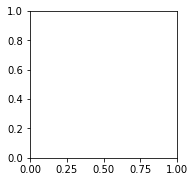

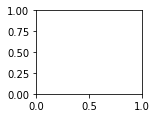

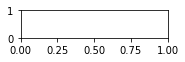

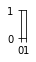

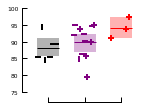

In [16]:
layout = fifi.svg_to_axes.FigureLayout('ski_summary.svg', 
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

ax = layout.axes[('percents', 'percents')]
markersize = 6
markeredgewidth = 2


# singles

fpl.scatter_box(ax, 0, single_values, color='black', hide_markers=True, use='mean')
ix = np.where(single_markers=='_')
fpl.scatter_box(ax, 0, single_values[ix], edgecolor='black', marker=single_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth, rasterized=False)
ix = np.where(single_markers=='|')
fpl.scatter_box(ax, 0, single_values[ix], edgecolor='black', marker=single_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth, rasterized=False)


# near far perp

fpl.scatter_box(ax, 2, near_far_perp_values, color='red', hide_markers=True, use='mean')
fpl.scatter_box(ax, 2, near_far_perp_values, edgecolor='red', marker=near_far_perp_markers[0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth, rasterized=False)

# others

fpl.scatter_box(ax, 1, other_values, color='purple', hide_markers=True, use='mean')

ix = np.where(other_markers=='_')
fpl.scatter_box(ax, 1, other_values[ix], edgecolor='purple', marker=other_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth, rasterized=False)

ix = np.where(other_markers=='+')
fpl.scatter_box(ax, 1, other_values[ix], edgecolor='purple', marker=other_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth, rasterized=False)

ix = np.where(other_markers=='|')
fpl.scatter_box(ax, 1, other_values[ix], edgecolor='purple', marker=other_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth, rasterized=False)







#ax.set_ylim(75, 100)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], xticks=[0,1,2])
ax.set_xticklabels([])
fifi.mpl_functions.set_fontsize(ax, 6)
layout.append_figure_to_layer(layout.figures['percents'], 'percents', cleartarget=True)
layout.write_svg('ski_summary.svg')

In [19]:
flystat.resampling.calc_statistical_significance_through_resampling(near_far_perp_values, single_values, 
                                                                    analysis='mean', iterations=10000)

(0.04160000000000008, 0.2058, 0.0225)

In [20]:
flystat.resampling.calc_statistical_significance_through_resampling(near_far_perp_values, other_values, 
                                                                    analysis='mean', iterations=10000)

(0.119, 0.0715, 0.0114)

# Quantity of features

In [21]:
single_combos = []
single_markers = []
for i, pi in enumerate(position):
    for j, pj in enumerate(position):
        if j==i:
            single_combos.append([i,j])
            if orientation[i] == orientation[j] == 'para':
                single_markers.append('_')
            elif orientation[i] == orientation[j] == 'perp':
                single_markers.append('|')
                    
single_quantities = []
for c in single_combos:
    single_quantities.append(pairs_number[c[0], c[1]])
ix_not_nan = ~np.isnan(single_quantities)
single_quantities = np.array(single_quantities)[ix_not_nan]
single_markers = np.array(single_markers)[ix_not_nan]

sorting = np.argsort(single_quantities)
single_quantities = single_quantities[sorting]
single_markers = single_markers[sorting]

###

near_far_perp_markers = []
near_far_perp_combos = []
for i, pi in enumerate(position):
    for j, pj in enumerate(position):
        if j<i:
            continue
        if pi != 'binding' and pj != 'binding':
            
            oi = orientation[i]
            oj = orientation[j]
            
            if pi != pj and oi != oj:
                near_far_perp_combos.append([i,j])
                near_far_perp_markers.append('+')
                
near_far_perp_quantities = []
for c in near_far_perp_combos:
    near_far_perp_quantities.append(pairs_number[c[0], c[1]])
ix_not_nan = ~np.isnan(near_far_perp_quantities)
near_far_perp_quantities = np.array(near_far_perp_quantities)[ix_not_nan]
near_far_perp_markers = np.array(near_far_perp_markers)[ix_not_nan]

sorting = np.argsort(near_far_perp_quantities)
near_far_perp_quantities = near_far_perp_quantities[sorting]
near_far_perp_markers = near_far_perp_markers[sorting]

###

other_combos = []
other_markers = []
for i, pi in enumerate(position):
    for j, pj in enumerate(position):
        if j<=i:
            continue
        
        if [i,j] in single_combos or [i, j] in near_far_perp_combos:
            continue
        else:
            
            other_combos.append([i,j])
            if orientation[i] == orientation[j] == 'para':
                other_markers.append('_')
            elif orientation[i] == orientation[j] == 'perp':
                other_markers.append('|')
            elif orientation[i] != orientation[j]:
                other_markers.append('+')
                    
other_quantities = []
for c in other_combos:
    other_quantities.append(pairs_number[c[0], c[1]])
ix_not_nan = ~np.isnan(other_quantities)
other_quantities = np.array(other_quantities)[ix_not_nan]
other_markers = np.array(other_markers)[ix_not_nan]

sorting = np.argsort(other_quantities)
other_quantities = other_quantities[sorting]
other_markers = other_markers[sorting]




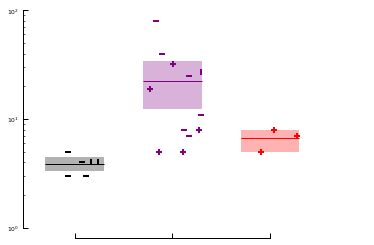

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
markersize = 6
markeredgewidth = 2


# singles

fpl.scatter_box(ax, 0, single_quantities, color='black', hide_markers=True, use='mean')
ix = np.where(single_markers=='_')
fpl.scatter_box(ax, 0, single_quantities[ix], edgecolor='black', marker=single_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth)
ix = np.where(single_markers=='|')
fpl.scatter_box(ax, 0, single_quantities[ix], edgecolor='black', marker=single_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth)


# near far perp

fpl.scatter_box(ax, 2, near_far_perp_quantities, color='red', hide_markers=True, use='mean')
fpl.scatter_box(ax, 2, near_far_perp_quantities, edgecolor='red', marker=near_far_perp_markers[0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth)

# others

fpl.scatter_box(ax, 1, other_quantities, color='purple', hide_markers=True, use='mean')

ix = np.where(other_markers=='_')
fpl.scatter_box(ax, 1, other_quantities[ix], edgecolor='purple', marker=other_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth)

ix = np.where(other_markers=='+')
fpl.scatter_box(ax, 1, other_quantities[ix], edgecolor='purple', marker=other_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth)

ix = np.where(other_markers=='|')
fpl.scatter_box(ax, 1, other_quantities[ix], edgecolor='purple', marker=other_markers[ix][0], 
                shading='none', markersize=markersize, markeredgewidth=markeredgewidth)



ax.set_yscale('log')
ax.set_ylim(10**0, 10**2)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], xticks=[1,2,3], yticks=[10**0, 10, 10**2])
ax.tick_params(which='minor', direction='in')

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], xticks=[0,1,2])
ax.set_xticklabels([])
fifi.mpl_functions.set_fontsize(ax, 6)


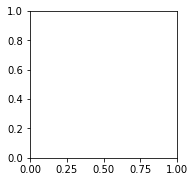

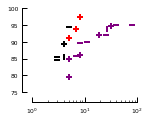

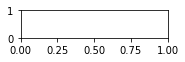

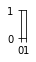

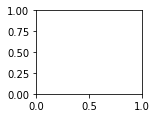

In [23]:
layout = fifi.svg_to_axes.FigureLayout('ski_summary.svg', 
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

ax = layout.axes[('numbers', 'numbers')]
markersize = 6
markeredgewidth = 2



# singles

ix = np.where(single_markers=='_')
ax.plot(single_quantities[ix], single_values[ix], single_markers[ix][0], 
                markeredgecolor='black', markersize=markersize, markeredgewidth=markeredgewidth)
ix = np.where(single_markers=='|')
ax.plot(single_quantities[ix], single_values[ix], single_markers[ix][0], 
                markeredgecolor='black', markersize=markersize, markeredgewidth=markeredgewidth)


# near far perp

ax.plot(near_far_perp_quantities, near_far_perp_values, '+', 
                markeredgecolor='red', markersize=markersize, markeredgewidth=markeredgewidth)

# others

ix = np.where(other_markers=='_')
ax.plot(other_quantities[ix], other_values[ix], other_markers[ix][0], 
                markeredgecolor='purple', markersize=markersize, markeredgewidth=markeredgewidth)

ix = np.where(other_markers=='+')
ax.plot(other_quantities[ix], other_values[ix], other_markers[ix][0], 
                markeredgecolor='purple', markersize=markersize, markeredgewidth=markeredgewidth)

ix = np.where(other_markers=='|')
ax.plot(other_quantities[ix], other_values[ix], other_markers[ix][0], 
                markeredgecolor='purple', markersize=markersize, markeredgewidth=markeredgewidth)



ax.set_xscale('log')
ax.set_xlim(10**0, 10**2)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], xticks=[10**0, 10, 10**2])
ax.tick_params(which='minor', direction='in')
fifi.mpl_functions.set_fontsize(ax, 6)
layout.append_figure_to_layer(layout.figures['numbers'], 'numbers', cleartarget=True)
layout.write_svg('ski_summary.svg')